## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is different when being performed on text data. Generally we work with numbers or the original data but with text we are working with representations of the data. In this EDA we will visualize the distribution of 2-grams/3-grams and compare the distribution of tweet lengths between the two Political Groups


[Click Here](https://gitlab.com/SeanCarey/Regis-MSDS-Practicum-1/blob/master/EDA.ipynb) for full code notebook


In [3]:
# @hidden_cell

import pandas as pd

import numpy as np
import os
import pickle
import boto3
s3 = boto3.resource('s3')
bucket_name = "msds-practicum-carey"

import seaborn as sns
import matplotlib.pyplot as plt

import altair as alt
alt.renderers.enable('notebook')

import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer


import matplotlib.pyplot as plt


import re
import spacy
import scattertext as st
#nlp = spacy.load("en_core_web_sm")

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])


import nltk
from nltk import FreqDist
from nltk.util import ngrams
import string

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [6]:
# @hidden_cell

with open('outdata/tweets_clean_df.pkl', 'wb') as data:
    s3.Bucket(bucket_name).download_fileobj('tweets_clean_df.pkl', data)
    


## Check for Data Imblance



I have close to equal proportions of liberal and conservative tweets. The Liberals seem to have tweeted a little more. Since it is an election year and they have a lot of people who are competing for nomination as Democratic Presidential Candidate.

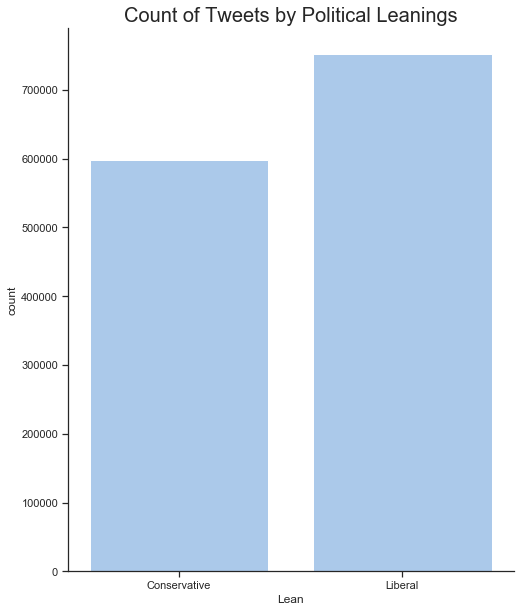

In [78]:

# read in df from pickle file
tweets_clean_df = pd.read_pickle('outdata/tweets_clean_df.pkl')

# get counts by political group
counts = tweets_clean_df.groupby("class").agg(
    count=('class',"count")).reset_index()

# Generate full text lables for use in graph
counts["Lean"] = np.where(counts['class']=='L',"Liberal", "Conservative")

# prepare data for plotting
counts = counts[["Lean", "count"]]

# begin plot
sns.set(style="ticks")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8,10))

# Barplot of parties
sns.set_color_codes("pastel")
g = sns.barplot(x="Lean",
            y="count",
            data=counts,
            color="b",
            ax=ax1).set_title("Count of Tweets by Political Leanings",
                             fontsize=20)
ax2.tick_params(labelsize=20)


sns.despine()





In [4]:
# separate corpus into Liberal and andZ Conservative lists for analysis 
lib_tweets = tweets_clean_df[tweets_clean_df['class']=='L']['clean_tweets'].tolist()
con_tweets = tweets_clean_df[tweets_clean_df['class']=='C']['clean_tweets'].tolist()

### Generate Top Word Counts  

Generate Top Word Counts
Wordcounts are an excellent way to see what topics are important within a corpus. By splitting the corpus up into two parts (liberal and conservative), we can get some wordcounts within those groups.

The 2-gram and 3-gram wordcounts are very helpful in showing what themes are being talked about by liberals and conservatives.

**Some of the top themes from liberal 2-grams and 3-grams are:**

"health care" , "president trump", "climate change", "affordable care act", "martin luther king", "gun violence prevention", "voting rights act". They seem to stick to what is considered "liberal" themes.

**Conservatives had a similar trend in 2-grams and 3-grams:**

"small business", "man woman", "health care", "tax reform", "national security", "tax cuts job", "man woman uniform", "law enforcment officer", "small business owner".

In [5]:
# get top bigrams
def get_top_n_bigram(corpus, n=None):
    vectors = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    words = vectors.transform(corpus)
    sum_words = words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectors.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = [i for i in words_freq if 'pron' not in i[0]]
    return words_freq[:n]

# get top trigrams
def get_top_n_trigram(corpus, n=None):
    vectors = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    words = vectors.transform(corpus)
    sum_words = words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectors.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = [i for i in words_freq if 'pron' not in i[0]]
    return words_freq[:n]

In [6]:
# conservative n gram counts
con_bigrams_top = get_top_n_bigram(con_tweets, 20)
con_trigrams_top = get_top_n_trigram(con_tweets, 20)

# liberal ngram counts
lib_bigrams_top = get_top_n_bigram(lib_tweets, 20)
lib_trigrams_top = get_top_n_trigram(lib_tweets, 20)

#convert to dataframe for easy plotting
con_tri_df = pd.DataFrame(con_trigrams_top, columns = ['Trigram','Counts'])
con_bi_df = pd.DataFrame(con_bigrams_top, columns = ['Bigram','Counts'])

#convert to dataframe for easy plotting
lib_tri_df = pd.DataFrame(lib_trigrams_top, columns = ['Trigram','Counts'])
lib_bi_df = pd.DataFrame(lib_bigrams_top, columns = ['Bigram','Counts'])

### Top 2-grams by Political Group

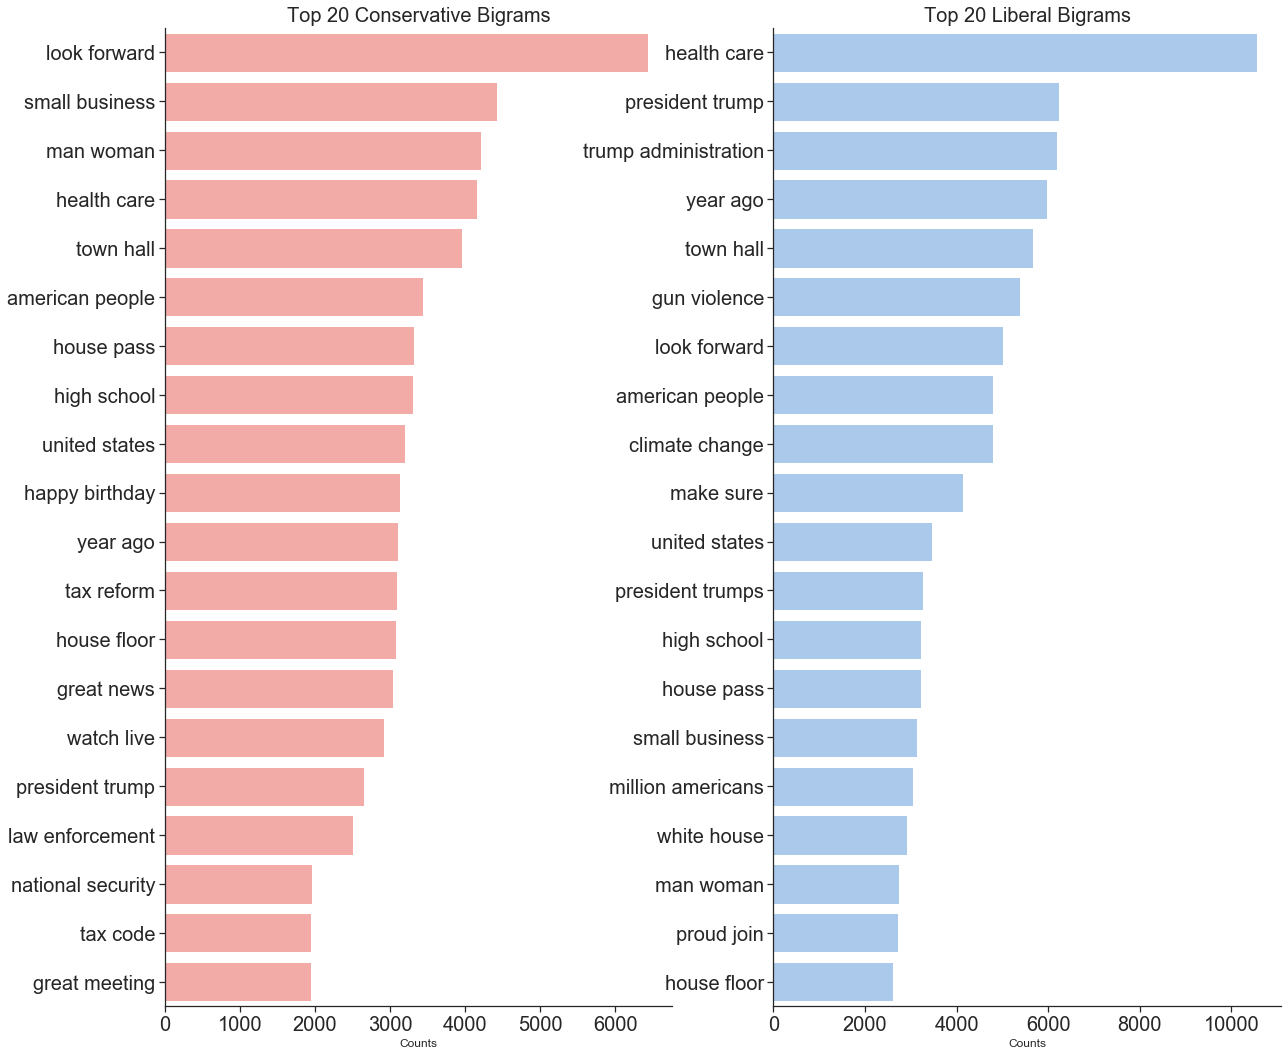

In [7]:
# @hidden_cell

# set seaborn theme
sns.set(style="ticks")

# Initialize the matplotlib figure
# define the column, row setting of the subplot
f, (ax1, ax2) = plt.subplots(1,
                             2,
                             figsize=(20,
                                      18))

# set plot color theme
sns.set_color_codes("pastel")

# define the plot type and the data inpus 
sns.barplot(y="Bigram",
            x="Counts",
            data=con_bi_df,
            label="Total",
            color="r",
            ax=ax1).set_title("Top 20 Conservative Bigrams",
                             fontsize=20)
# remove y axis label
ax1.set_ylabel("")

# chagne size of axis tick labels 
ax1.tick_params(labelsize=20)

# define second 
sns.barplot(y="Bigram",
            x="Counts",
            data=lib_bi_df,
            label="Total",
            color="b",
            ax=ax2).set_title("Top 20 Liberal Bigrams",
                             fontsize=20)
ax2.set_ylabel("")
ax2.tick_params(labelsize=20)
sns.despine()

### Top 3-grams by Political Group


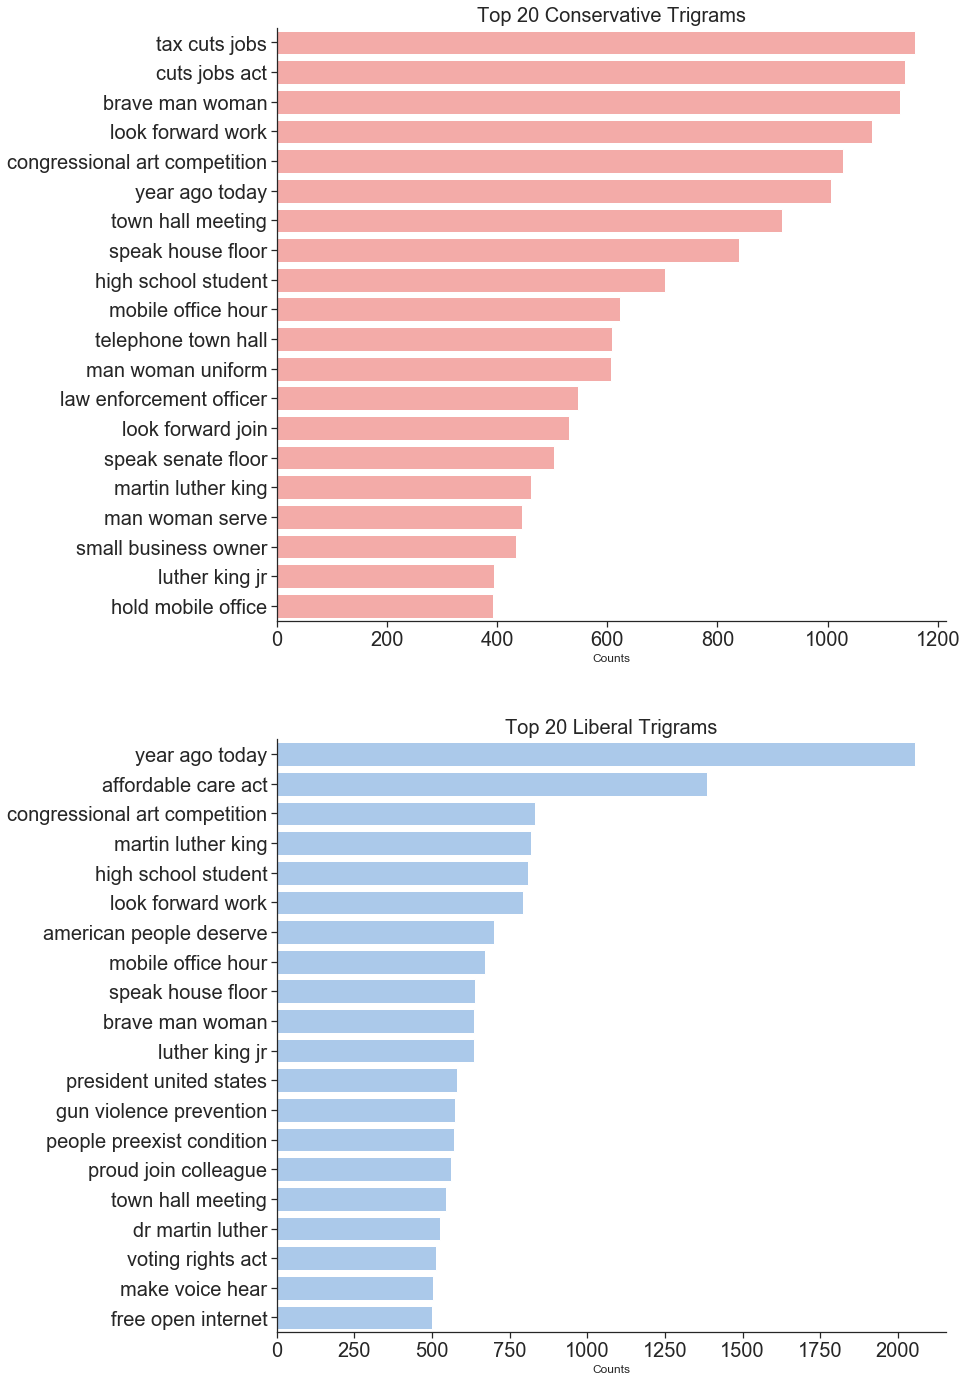

In [8]:
# @hidden_cell

# Initialize the matplotlib figure
f, (ax1, ax2) = plt.subplots(2,
                             1,
                             figsize=(12,
                                      24))

# set color theme
sns.set_color_codes("pastel")

# first bar plot
sns.barplot(y="Trigram",
            x="Counts",
            data=con_tri_df,
            label="Total",
            color="r",
            ax=ax1).set_title("Top 20 Conservative Trigrams",
                              fontsize=20)
# set y axis label to blank 
ax1.set_ylabel("")

# make axis tick labels larger
ax1.tick_params(labelsize=20)

# secodn barplot
sns.barplot(y="Trigram",
            x="Counts",
            data=lib_tri_df,
            label="Total",
            color="b",
            ax=ax2).set_title("Top 20 Liberal Trigrams",
                             fontsize=20)

ax2.set_ylabel("")
ax2.tick_params(labelsize=20)


sns.despine()

## Get Charachter and Word Counts per TWeet  

Do Liberals have longer tweets? Or do Conservatives? To judge we will make histograms of the distribution of "Tweet Length by Character" and "Tweet Length by Word". 

In [8]:
tweets_clean_df['words_per_tweet'] = [len(x.split(" ")) for x in tweets_clean_df['tweet'].tolist()]
tweets_clean_df['chars_per_tweet'] = [len(x) for x in tweets_clean_df['tweet'].tolist()]

In [76]:
tweets_clean_df[['words_per_tweet','chars_per_tweet']].sample(10)

words_per_tweet  chars_per_tweet
748989                 4               42
761081                13               98
581458                19              127
763005                20              146
674677                17              143
1172019               16              129
136311                16              137
432322                26              140
491182                20              140
550561                19              140

### Combined distrubuion of Tweet Lenghs. 

This distribution includes Conservative and Liberal Tweets.  

It looks like Tweets are general around 20 words or 140 Characters. 

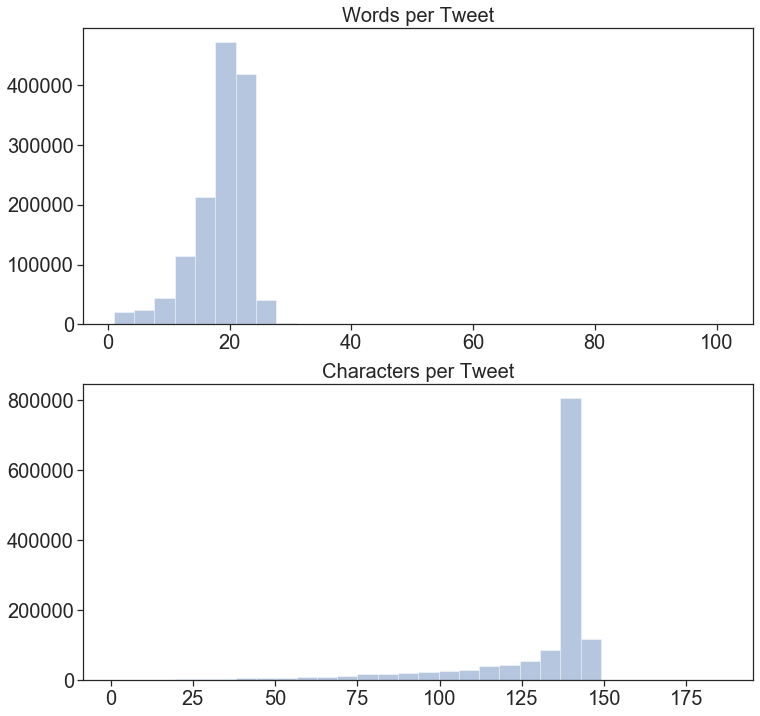

In [54]:
char_count = tweets_clean_df.chars_per_tweet.tolist()
word_count = tweets_clean_df.words_per_tweet.tolist()

f, (ax1,ax2) = plt.subplots(2,1,figsize=(12,12))

# set color theme
sns.set_color_codes("pastel")

# --------Top Plot-----------------
sns.distplot(word_count, kde=False,
             bins=30,
            ax=ax1).set_title("Words per Tweet",
                             fontsize=20)
ax1.tick_params(labelsize=20)

# ----------lower plot ------------
sns.distplot(char_count, kde=False,
             bins=30,
            ax=ax2).set_title("Characters per Tweet",
                             fontsize=20)
ax2.tick_params(labelsize=20)


### Distribution of Tweet Lengths by Party  

The trend of tweets being about 20 words or 140 characters seem to be a trend
shared by both Liberals and Conservative. 

No significant difference in the distribution of  tweet length between Liberals and Conservatives is aparent. 

In [60]:
# conservative char counts
con_chars_count =
tweets_clean_df[tweets_clean_df['class']=='C']['chars_per_tweet']
# Liberal char counts
lib_chars_count =
tweets_clean_df[tweets_clean_df['class']=='L']['chars_per_tweet']

# Conservative word counts
con_word_count = 
tweets_clean_df[tweets_clean_df['class']=='C']['words_per_tweet']

# Libeal word counts
lib_word_count =
tweets_clean_df[tweets_clean_df['class']=='L']['words_per_tweet']



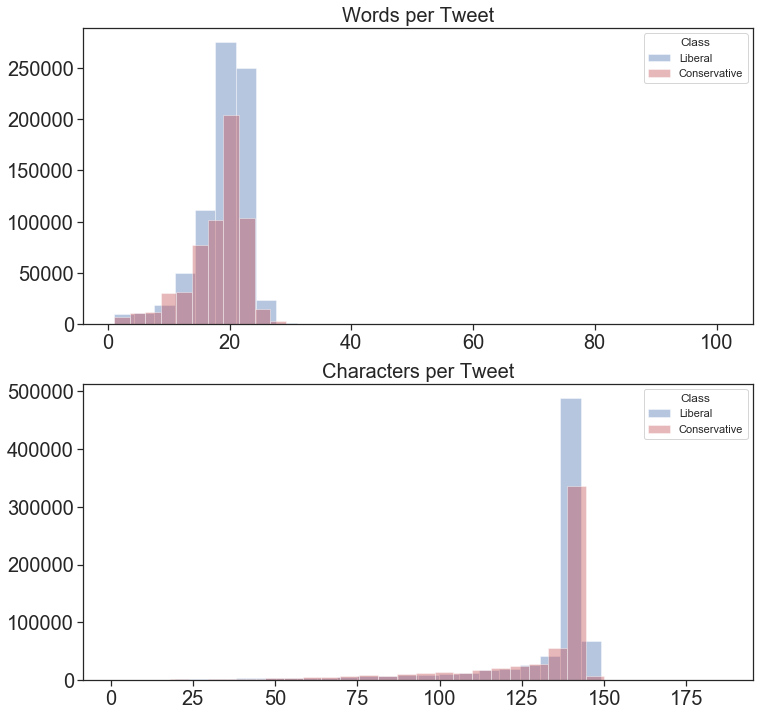

In [74]:

f, (ax1,ax2) = plt.subplots(2,1,figsize=(12,12))

# set color theme
sns.set_color_codes("deep")


# --------------top plot---------------------
# histogram of liberal word counts
sns.distplot(lib_word_count, kde=False,
             bins=30,
              color='b',
            ax=ax1)

# histogram of conservative word counts
sns.distplot(con_word_count, kde=False,
             bins=30,
             color='r',
            ax=ax1).set_title("Words per Tweet",
                             fontsize=20)
ax1.tick_params(labelsize=20)
ax1.set_xlabel("")
ax1.legend(title='Class', loc='upper right', labels=['Liberal', 'Conservative'])


#----------lower plot----------------------
# histogram of liberal character counts
sns.distplot(lib_chars_count, kde=False,
             bins=30,
              color='b',
            ax=ax2)

# histogram of conservative character counts
sns.distplot(con_chars_count, kde=False,
             bins=30,
             color='r',
            ax=ax2).set_title("Characters per Tweet",
                             fontsize=20)
ax2.tick_params(labelsize=20)
ax2.set_xlabel("")
ax2.legend(title='Class', loc='upper right', labels=['Liberal', 'Conservative'])


### Next steps  

Now that we understand the data the next steps are to prepare the data for modeling and to build the model!! 